# Taxi Experiment
### Import Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import wrappers, envs

import time, sys

## Run Episodes

In [2]:
def run_episodes(environment, policy, gamma):
    state = environment.reset()[0]
    total_reward = 0
    step = 0
    win = 0
    done = False
    while not done:
        state, reward, done, _, __ = env.step(int(policy[state]))
        total_reward += (gamma ** step * reward)
        step += 1
        if done and reward == 1.0:
            win += 1
            break
    return total_reward, win

## Policy Iteration

In [3]:
def policy_iteration(environment, gamma, max_iters = 200000):
    policy = np.random.choice(environment.action_space.n, size = environment.observation_space.n)
    desc = environment.unwrapped.desc
    for i in range(max_iters):
        old_policy_val_func = compute_value_function(environment, policy, gamma)
        new_policy = policy_extraction(environment, old_policy_val_func, gamma)
        if np.all(policy == new_policy):
            k = i + 1
            break
        policy = new_policy
    return policy, k

## Policy Evaluation

In [4]:
def policy_evaluation(environment, policy, gamma, n = 100):
    wins = 0
    scores = []
    for i in range(n):
            score, win = run_episodes(environment, policy, gamma)
            scores.append(score)
            wins += win
    scores = [run_episodes(environment, policy, gamma) for _ in range(n)]
    return np.mean(scores), wins

## Policy Extraction

In [5]:
def policy_extraction(environment, v, gamma):
    policy = np.zeros(environment.observation_space.n)
    for state in range(environment.observation_space.n):
        q_sa = np.zeros(environment.action_space.n)
        for action in range(environment.action_space.n):
            q_sa[action] = sum([p * (r + gamma * v[state_]) for p, state_, r, _ in environment.P[state][action]])
        policy[state] = np.argmax(q_sa)
    return policy

## Compute Value Function

In [6]:
def compute_value_function(environment, policy, gamma):
    V = np.zeros(environment.observation_space.n)
    epsilon = 1e-05
    
    while True:
        prev_v = np.copy(V)
        for state in range(environment.observation_space.n):
            policy_action = policy[state]
            V[state] = sum([p * (r + gamma * prev_v[state_]) for p, state_, r, is_done, in environment.P[state][policy_action]])
        delta = np.sum(np.fabs(prev_v-V))
        if delta <= epsilon:
            break
    return V

## Value Iteration

In [7]:
def value_iteration(environment, gamma, max_iters=100000):
    V = np.zeros(environment.observation_space.n)
    epsilon = 1e-20
#     desc = environment.unwrapped.desc
    for i in range(max_iters):
        prev_v = np.copy(V)
        for state in range(environment.observation_space.n):
            q_sa = [sum([p*(r + gamma*prev_v[state_]) for p, state_, r, _ in env.P[state][action]]) for action in range(environment.action_space.n)]
            V[state] = max(q_sa)
        delta = np.sum(np.fabs(prev_v-V))
        if delta <= epsilon:
            k = i + 1
            break
    return V, k

## Begin Experiment

In [41]:
env = gym.make('Taxi-v3')
env = env.unwrapped
desc = env.unwrapped.desc

time_arr = [0] * 10
gamma_arr = [0] * 10
its = [0] * 10
scores_list = [0] * 10

## Policy Iteration Analysis

In [14]:
n_episodes = 1000
for i in range(3,10):
    start = time.time()
    gamma = (i + 0.5) / 10
    
    best_policy, k = policy_iteration(env, gamma)
    policy_score, wins = policy_evaluation(env, best_policy, gamma, n=n_episodes)
    end = time.time()
    gamma_arr[i] = gamma
    scores_list[i] = policy_score
    its[i] = k
    time_arr[i] = end-start
    
    print(f'Summar (gamma = {gamma}):')
    print(f'Average wins over {n_episodes} episodes: {wins}')
    print(f'Average reward over {n_episodes} episodes: {policy_score}')
    print('-----------------------------------------------------------------------')

Summar (gamma = 0.35):
Average wins over 1000 episodes: 0
Average reward over 1000 episodes: -0.7680264496563852
-----------------------------------------------------------------------
Summar (gamma = 0.45):
Average wins over 1000 episodes: 0
Average reward over 1000 episodes: -0.9034032702652418
-----------------------------------------------------------------------
Summar (gamma = 0.55):
Average wins over 1000 episodes: 0
Average reward over 1000 episodes: -1.0811476141332248
-----------------------------------------------------------------------
Summar (gamma = 0.65):
Average wins over 1000 episodes: 0
Average reward over 1000 episodes: -1.3031285304956368
-----------------------------------------------------------------------
Summar (gamma = 0.75):
Average wins over 1000 episodes: 0
Average reward over 1000 episodes: -1.4949355880548245
-----------------------------------------------------------------------
Summar (gamma = 0.85):
Average wins over 1000 episodes: 0
Average reward ov

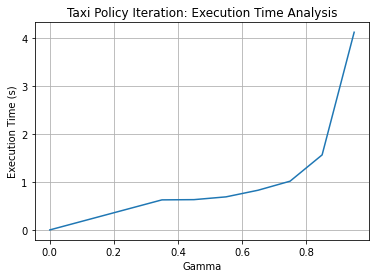

In [15]:
plt.plot(gamma_arr, time_arr)
plt.xlabel('Gamma')
plt.ylabel('Execution Time (s)')
plt.title('Taxi Policy Iteration: Execution Time Analysis')
plt.grid()
plt.savefig('TPI time analysis ' + str(n_episodes) + 'ep.png')

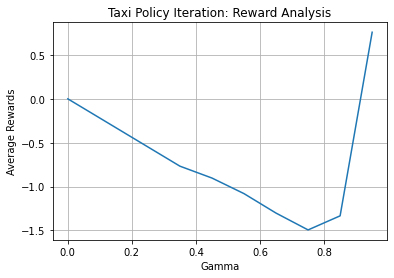

In [16]:
plt.plot(gamma_arr, scores_list)
plt.xlabel('Gamma')
plt.ylabel('Average Rewards')
plt.title('Taxi Policy Iteration: Reward Analysis')
plt.grid()
plt.savefig('TPI reward analysis ' + str(n_episodes) + 'ep.png')

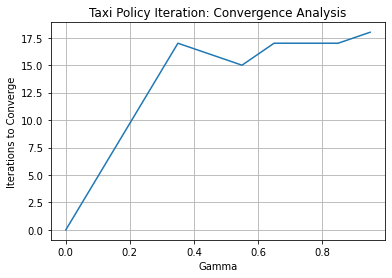

In [17]:
plt.plot(gamma_arr, its)
plt.xlabel('Gamma')
plt.ylabel('Iterations to Converge')
plt.title('Taxi Policy Iteration: Convergence Analysis')
plt.grid()
plt.savefig('TPI convergence analysis ' + str(n_episodes) + 'ep.png')

## Value Iteration Analysis

In [19]:
best_vals = [0] * 10
n_epidoes = 1000

for i in range(2,10):
    start = time.time()
    gamma = (i + 0.5) / 10
    best_value, k = value_iteration(env, gamma)
    policy = policy_extraction(env, best_value, gamma)
    policy_score, wins = policy_evaluation(env, policy, gamma, n=n_episodes)
    end = time.time()
    gamma_arr[i] = gamma
    its[i] = k
    best_vals[i] = best_value
    scores_list[i] = policy_score
    time_arr[i] = end-start
    
    print(f'Summary (gamma = {gamma}):')
    print(f'Total wins over {n_episodes} episodes: {wins}')
    print(f'Average reward over {n_episodes} episodes: {policy_score}')
    print('-----------------------------------------------------------------------')

Summary (gamma = 0.25):
Total wins over 1000 episodes: 0
Average reward over 1000 episodes: -0.6665436630118639
-----------------------------------------------------------------------
Summary (gamma = 0.35):
Total wins over 1000 episodes: 0
Average reward over 1000 episodes: -0.7682006143987147
-----------------------------------------------------------------------
Summary (gamma = 0.45):
Total wins over 1000 episodes: 0
Average reward over 1000 episodes: -0.90338593607269
-----------------------------------------------------------------------
Summary (gamma = 0.55):
Total wins over 1000 episodes: 0
Average reward over 1000 episodes: -1.0813507978868466
-----------------------------------------------------------------------
Summary (gamma = 0.65):
Total wins over 1000 episodes: 0
Average reward over 1000 episodes: -1.296235462519401
-----------------------------------------------------------------------
Summary (gamma = 0.75):
Total wins over 1000 episodes: 0
Average reward over 1000 e

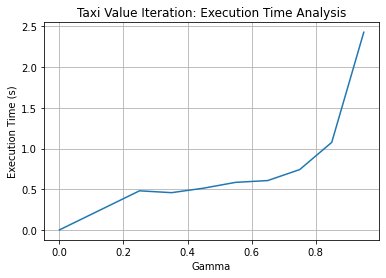

In [20]:
plt.plot(gamma_arr, time_arr)
plt.xlabel('Gamma')
plt.ylabel('Execution Time (s)')
plt.title('Taxi Value Iteration: Execution Time Analysis')
plt.grid()
plt.savefig('TVI ' + str(n_episodes) + 'ep.png')

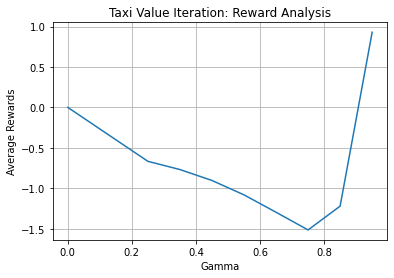

In [21]:
plt.plot(gamma_arr, scores_list)
plt.xlabel('Gamma')
plt.ylabel('Average Rewards')
plt.title('Taxi Value Iteration: Reward Analysis')
plt.grid()
plt.savefig('TVI reward analysis ' + str(n_episodes) + 'ep.png')

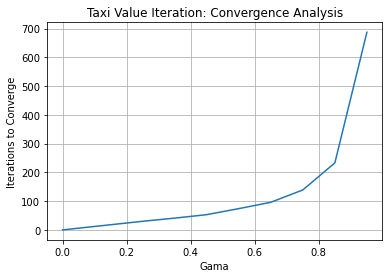

In [22]:
plt.plot(gamma_arr, its)
plt.xlabel('Gama')
plt.ylabel('Iterations to Converge')
plt.title('Taxi Value Iteration: Convergence Analysis')
plt.grid()
plt.savefig('TVI convergence analysis ' + str(n_episodes) + 'ep.png')

## Q-Learning Analysis

In [49]:
start = time.time()
reward_arr = []
its_arr = []
size_arr = []
chunks_arr = []
avgs_arr = []
time_arr = []
Q_arr = []

for i in range(0,10):
    epsilon = (i + 0.5) / 10
    print(f'Summary (ε={epsilon}):')
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    iters = []
    optimal = [0]*env.observation_space.n
    alpha = 1.0
    gamma = 1.0
    n_episodes = 20000
    wins = 0
    env = gym.make('Taxi-v3')
    env = env.unwrapped
    desc = env.unwrapped.desc
    for episode in range(n_episodes):
        state = env.reset()[0]
        done = False
        t_reward = 0
        max_steps = 1000000
        for j in range(max_steps):
            if done:
                break
            current = state
            if np.random.rand() < epsilon:
                action = np.argmax(Q[current, :])
            else:
                action = env.action_space.sample()
                
            state, reward, done, info, _ = env.step(action)
            if reward == 1.0:
                wins += 1
            t_reward += reward
            Q[current, action] += alpha * (reward + gamma * np.max(Q[state, :]) - Q[current, action])
        epsilon = (1-2.71**(-episode/1000))
        alpha = 2.71**(-episode/1000)
        rewards.append(t_reward)
        iters.append(i)
    for state in range(env.observation_space.n):
        optimal[state] = np.argmax(Q[state, :])
        
    reward_arr.append(rewards)
    its_arr.append(iters)
    Q_arr.append(Q)
    
    env.close()
    end = time.time()
    time_arr.append(end-start)
        
    def chunk_list(rewards, size):
        for i in range(0, len(rewards), size):
            yield rewards[i:i+size]
            
    size = int(n_episodes / 50)
    chunks = list(chunk_list(rewards, size))
    avgs = [sum(chunk)/len(chunk) for chunk in chunks]
    size_arr.append(size)
    chunks_arr.append(chunks)
    avgs_arr.append(avgs)
    
    print(f'Wins over {n_episodes} episodes: {wins}')
    print(f'Average reward of {n_episodes} episodes: {np.mean(rewards)}')
    print('-----------------------------------------------------------------------')

Summary (ε=0.05):
Wins over 20000 episodes: 0
Average reward of 20000 episodes: -16.20695
Summary (ε=0.15):
Wins over 20000 episodes: 0
Average reward of 20000 episodes: -17.5547
Summary (ε=0.25):
Wins over 20000 episodes: 0
Average reward of 20000 episodes: -14.56995
Summary (ε=0.35):
Wins over 20000 episodes: 0
Average reward of 20000 episodes: -12.02305
Summary (ε=0.45):
Wins over 20000 episodes: 0
Average reward of 20000 episodes: -16.4804
Summary (ε=0.55):
Wins over 20000 episodes: 0
Average reward of 20000 episodes: -18.07805
Summary (ε=0.65):
Wins over 20000 episodes: 0
Average reward of 20000 episodes: -16.07985
Summary (ε=0.75):
Wins over 20000 episodes: 0
Average reward of 20000 episodes: -11.8657
Summary (ε=0.85):
Wins over 20000 episodes: 0
Average reward of 20000 episodes: -13.4014
Summary (ε=0.95):
Wins over 20000 episodes: 0
Average reward of 20000 episodes: -17.00525


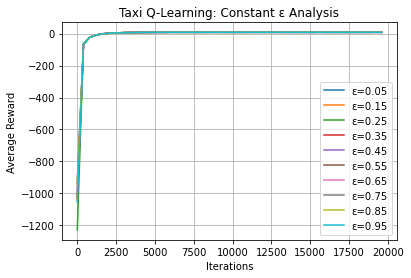

In [45]:
for i in range(0, 10):
    epsilon = (i + 0.5) / 10
    plt.plot(range(0, len(reward_arr[i]), size_arr[i]), avgs_arr[i], label = 'ε=' + str(epsilon))
    
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title('Taxi Q-Learning: Constant ε Analysis')
plt.grid()

In [60]:
start=time.time()
Q = np.zeros((env.observation_space.n, env.action_space.n))
rewards = []
iters = []
optimal=[0]*env.observation_space.n
alpha = 1.0
gamma = 1.0
episodes = 20000
epsilon=0
wins = 0

for episode in range(episodes):
    state = env.reset()[0]
    done = False
    t_reward = 0
    max_steps = 1000000
    
    for i in range(max_steps):
        if done:
            break
        current = state
        if np.random.rand()<epsilon:
            action = np.argmax(Q[current, :])
        else:
            action = env.action_space.sample()
        state, reward, done, info, _ = env.step(action)
        t_reward += reward
        Q[current, action] += alpha * (reward + gamma * np.max(Q[state, :]) - Q[current, action])
        
        if reward == 1.0:
            wins += 1
        
    epsilon=(1-2.71**(-episode/1000))
    alpha=2.71**(-episode/1000)
    rewards.append(t_reward)
    iters.append(i)
    
for k in range(env.observation_space.n):
    optimal[k]=np.argmax(Q[k, :])
env.close()
end=time.time()
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

size = 5
chunks = list(chunk_list(rewards, size))
averages = [sum(chunk) / len(chunk) for chunk in chunks]

In [61]:
print('Summary:')
print(f'Execution time: {end-start}')
print(f'Average rewards: {np.average(rewards[2000:])}')
print(f'Total wins: {wins}')

Summary:
Execution time: 9.728202104568481
Average rewards: 7.541
Total wins: 0


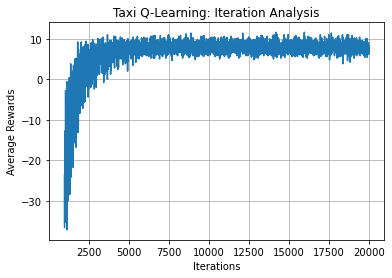

In [59]:
plt.plot(range(0, len(rewards), size)[200:], averages[200:])
plt.xlabel('Iterations')
plt.ylabel('Average Rewards')
plt.title('Taxi Q-Learning: Iteration Analysis')
plt.grid()
plt.savefig('TQ analysis.png')